# From the MQT YAQS Documentation

Developing a simulation of a given noise model

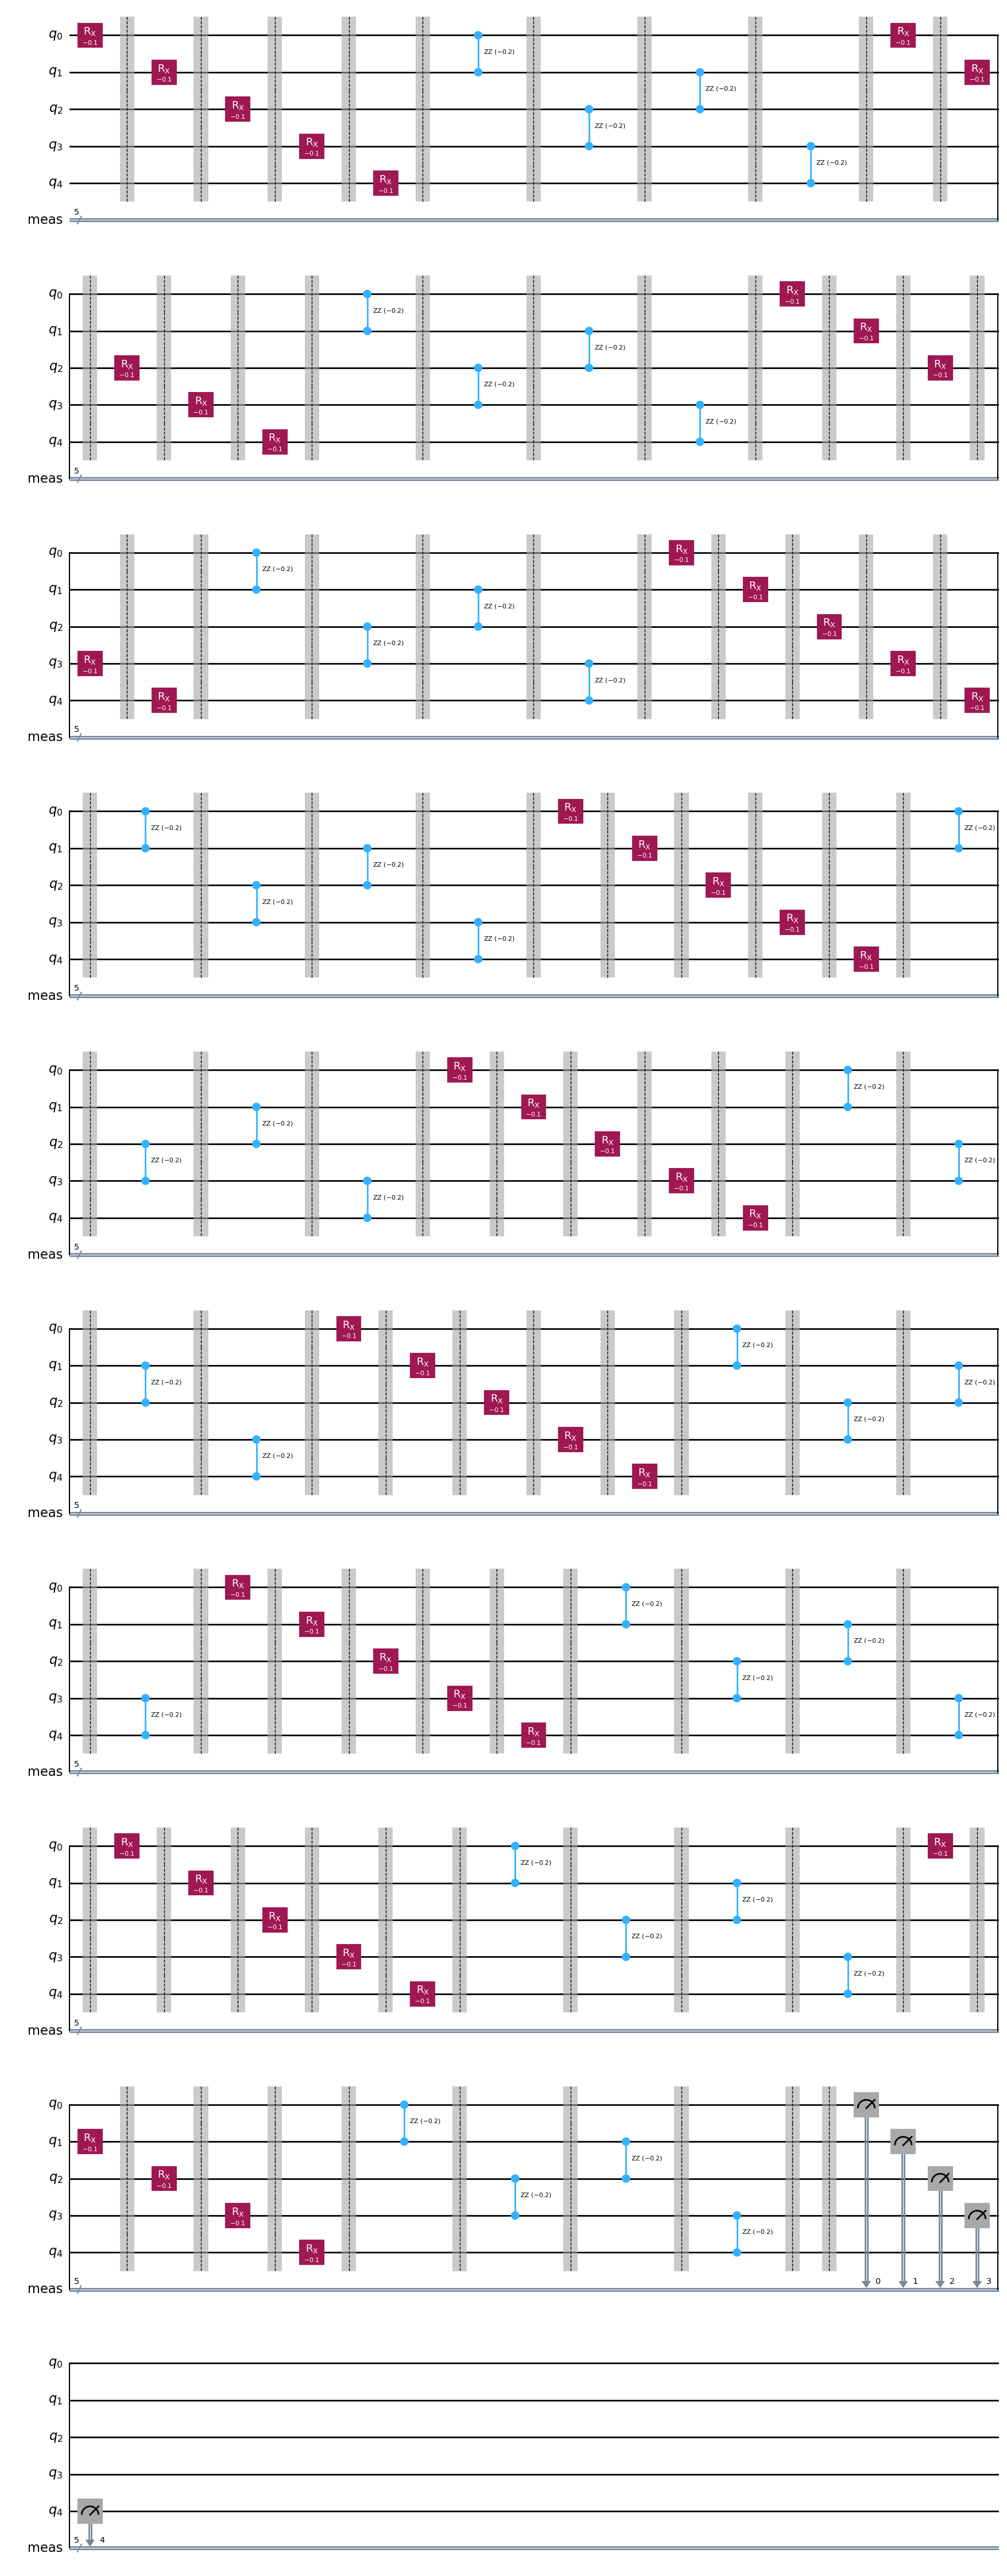

In [1]:
from mqt.yaqs.core.libraries.circuit_library import create_ising_circuit

num_qubits = 5
circuit = create_ising_circuit(L=num_qubits, J=1, g=0.5, dt=0.1, timesteps=10)
circuit.measure_all()
circuit.draw(output="mpl")

Below is edited as the documentation `TwoLocal()` function is deprecated in the current version of Qiskit

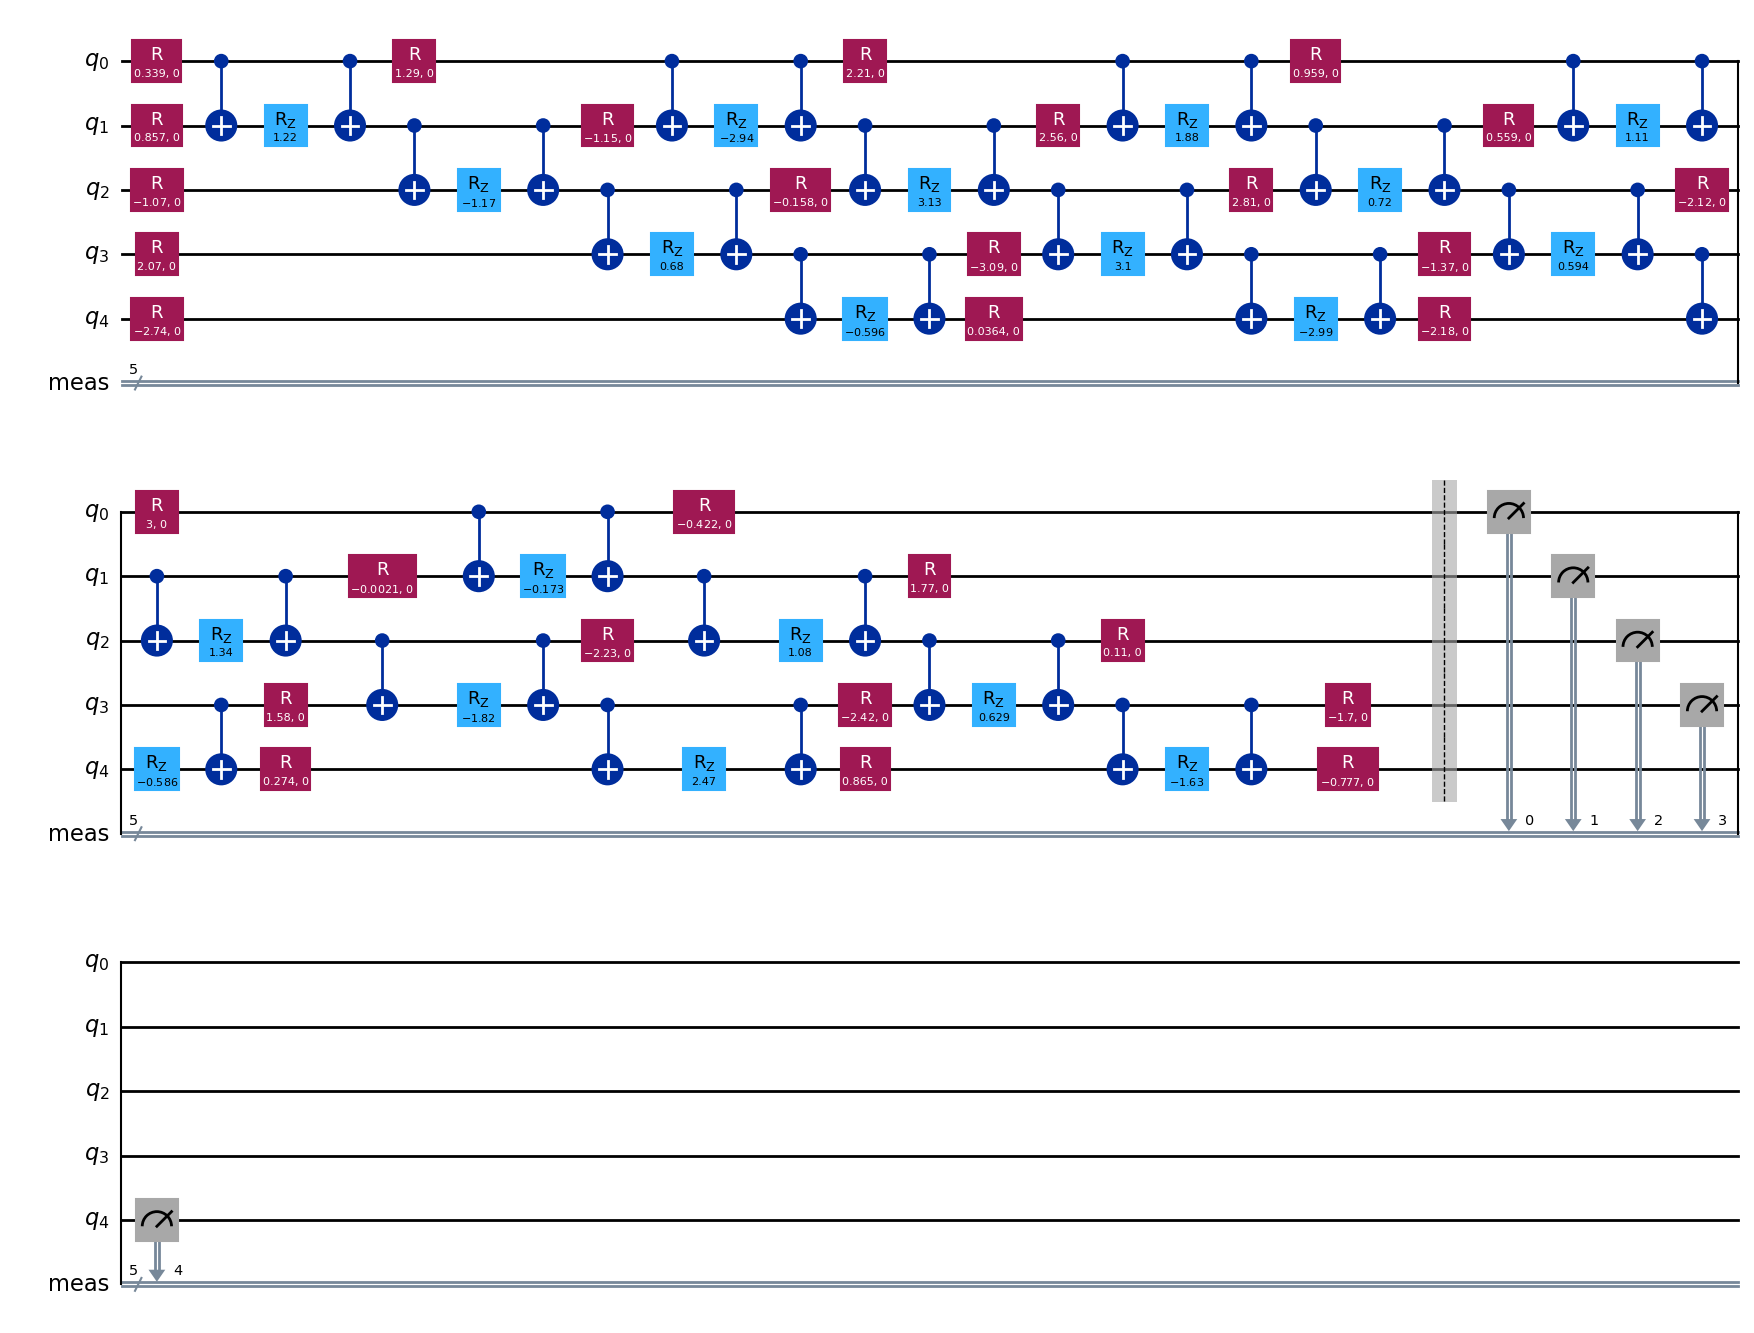

In [28]:
import qiskit.circuit.library.n_local as TwoLocal

import numpy as np

num_qubits = 5
circuit = TwoLocal(num_qubits, ["rx"], ["rzz"], entanglement="linear", reps=num_qubits).decompose()
num_pars = len(circuit.parameters)
rng = np.random.default_rng()
values = rng.uniform(-np.pi, np.pi, size=num_pars)
circuit.assign_parameters(values, inplace=True)
circuit.measure_all()
circuit.draw(output="mpl")

In [61]:
for i in {
        (0, 1),
        (0, 2),
        (0, 3),
        (1, 0),
        (1, 2),
        (2, 0),
        (2, 1),
        (3, 0),
        (3, 4),
        (4, 3)
    }:
    print(list(i))

[0, 1]
[1, 2]
[2, 1]
[3, 4]
[4, 3]
[0, 3]
[2, 0]
[3, 0]
[0, 2]
[1, 0]


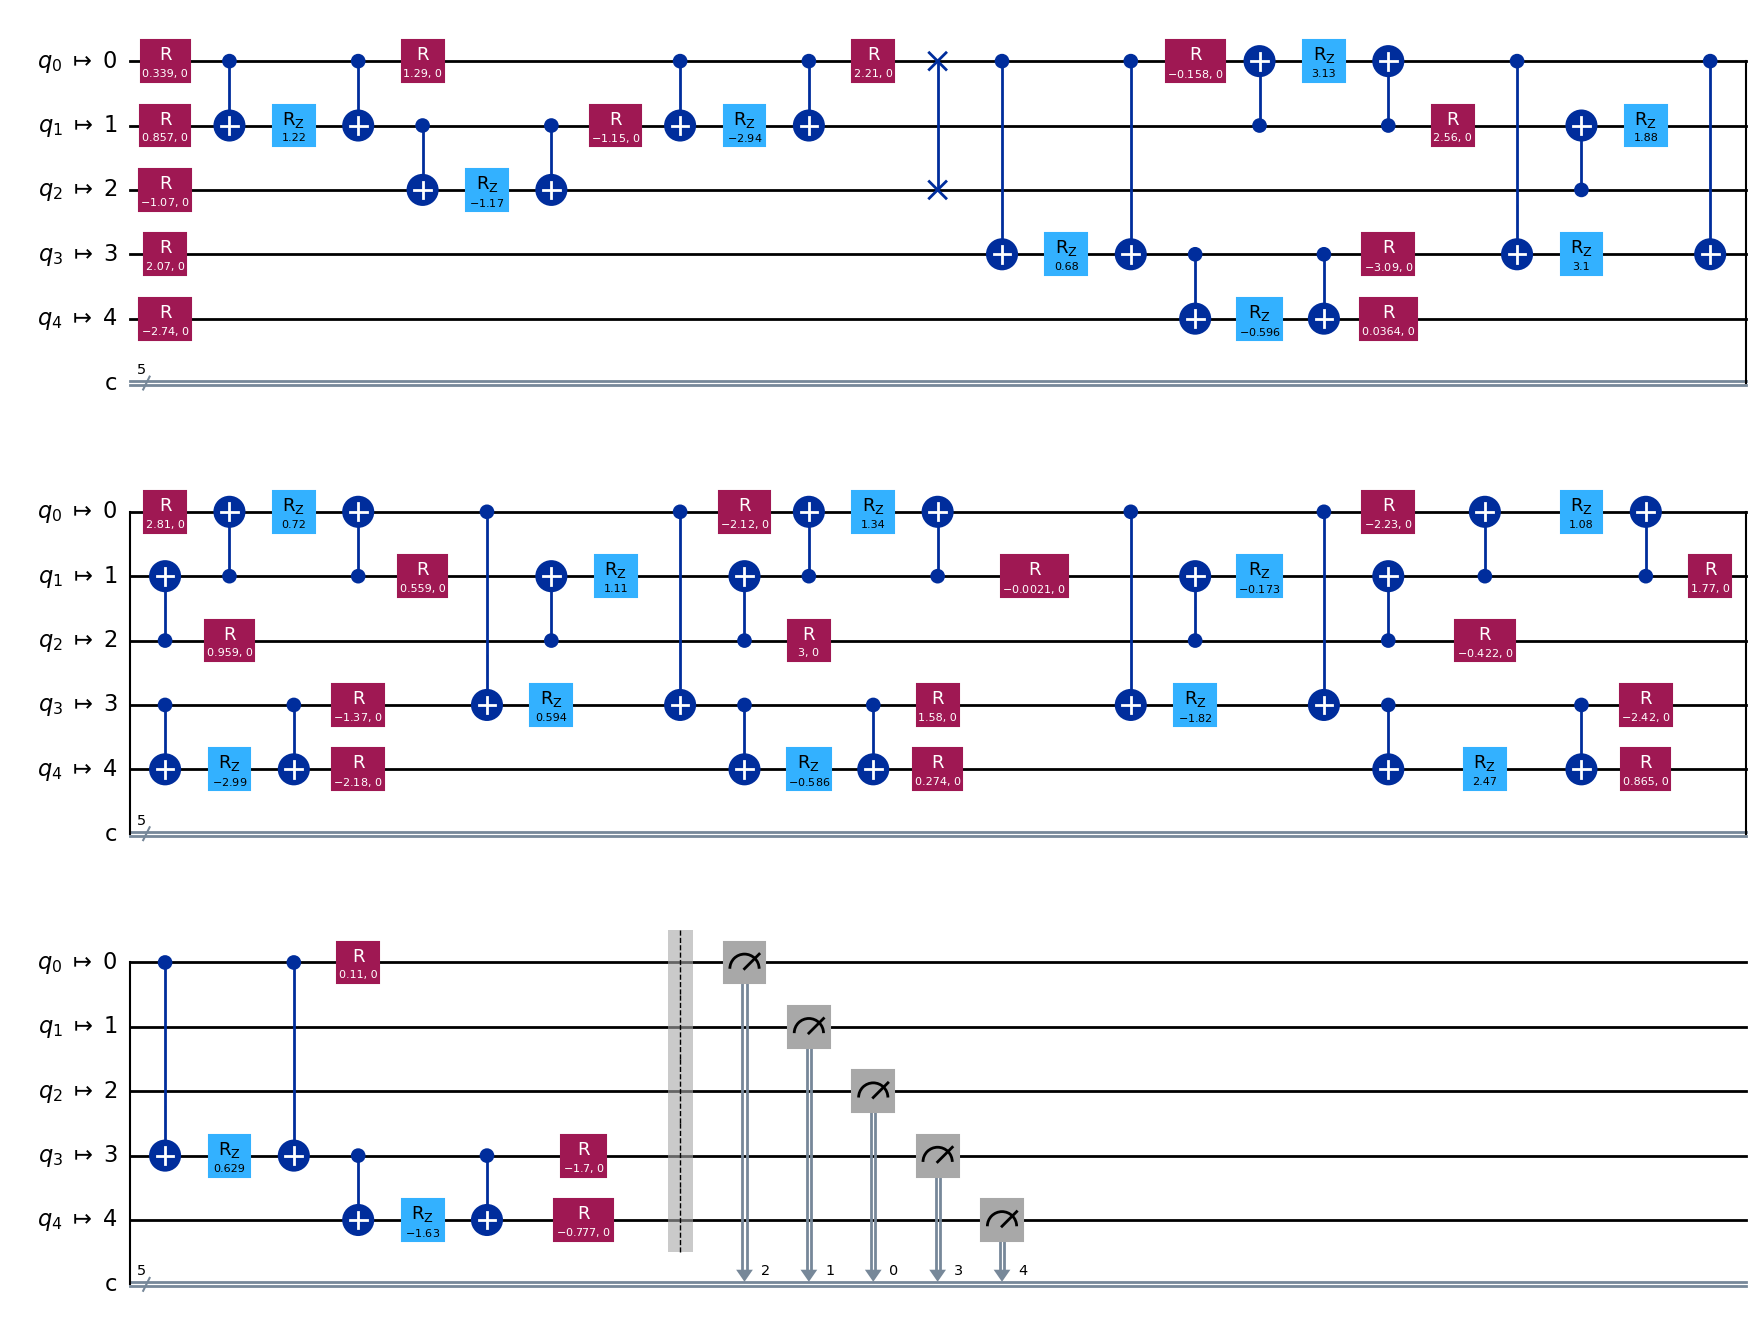

In [59]:
from mqt.qmap.plugins.qiskit.sc import compile
from mqt.qmap.sc import Method
from mqt.qmap.sc import Architecture

connectivity_set = {
        (0, 1),
        (0, 2),
        (0, 3),
        (1, 0),
        (1, 2),
        (2, 0),
        (2, 1),
        (3, 0),
        (3, 4),
        (4, 3)
    }

arch = Architecture(
    5, connectivity_set)

qc_mapped, res = compile(circuit, arch, method=Method.heuristic, post_mapping_optimizations=True)
qc_mapped.draw("mpl")

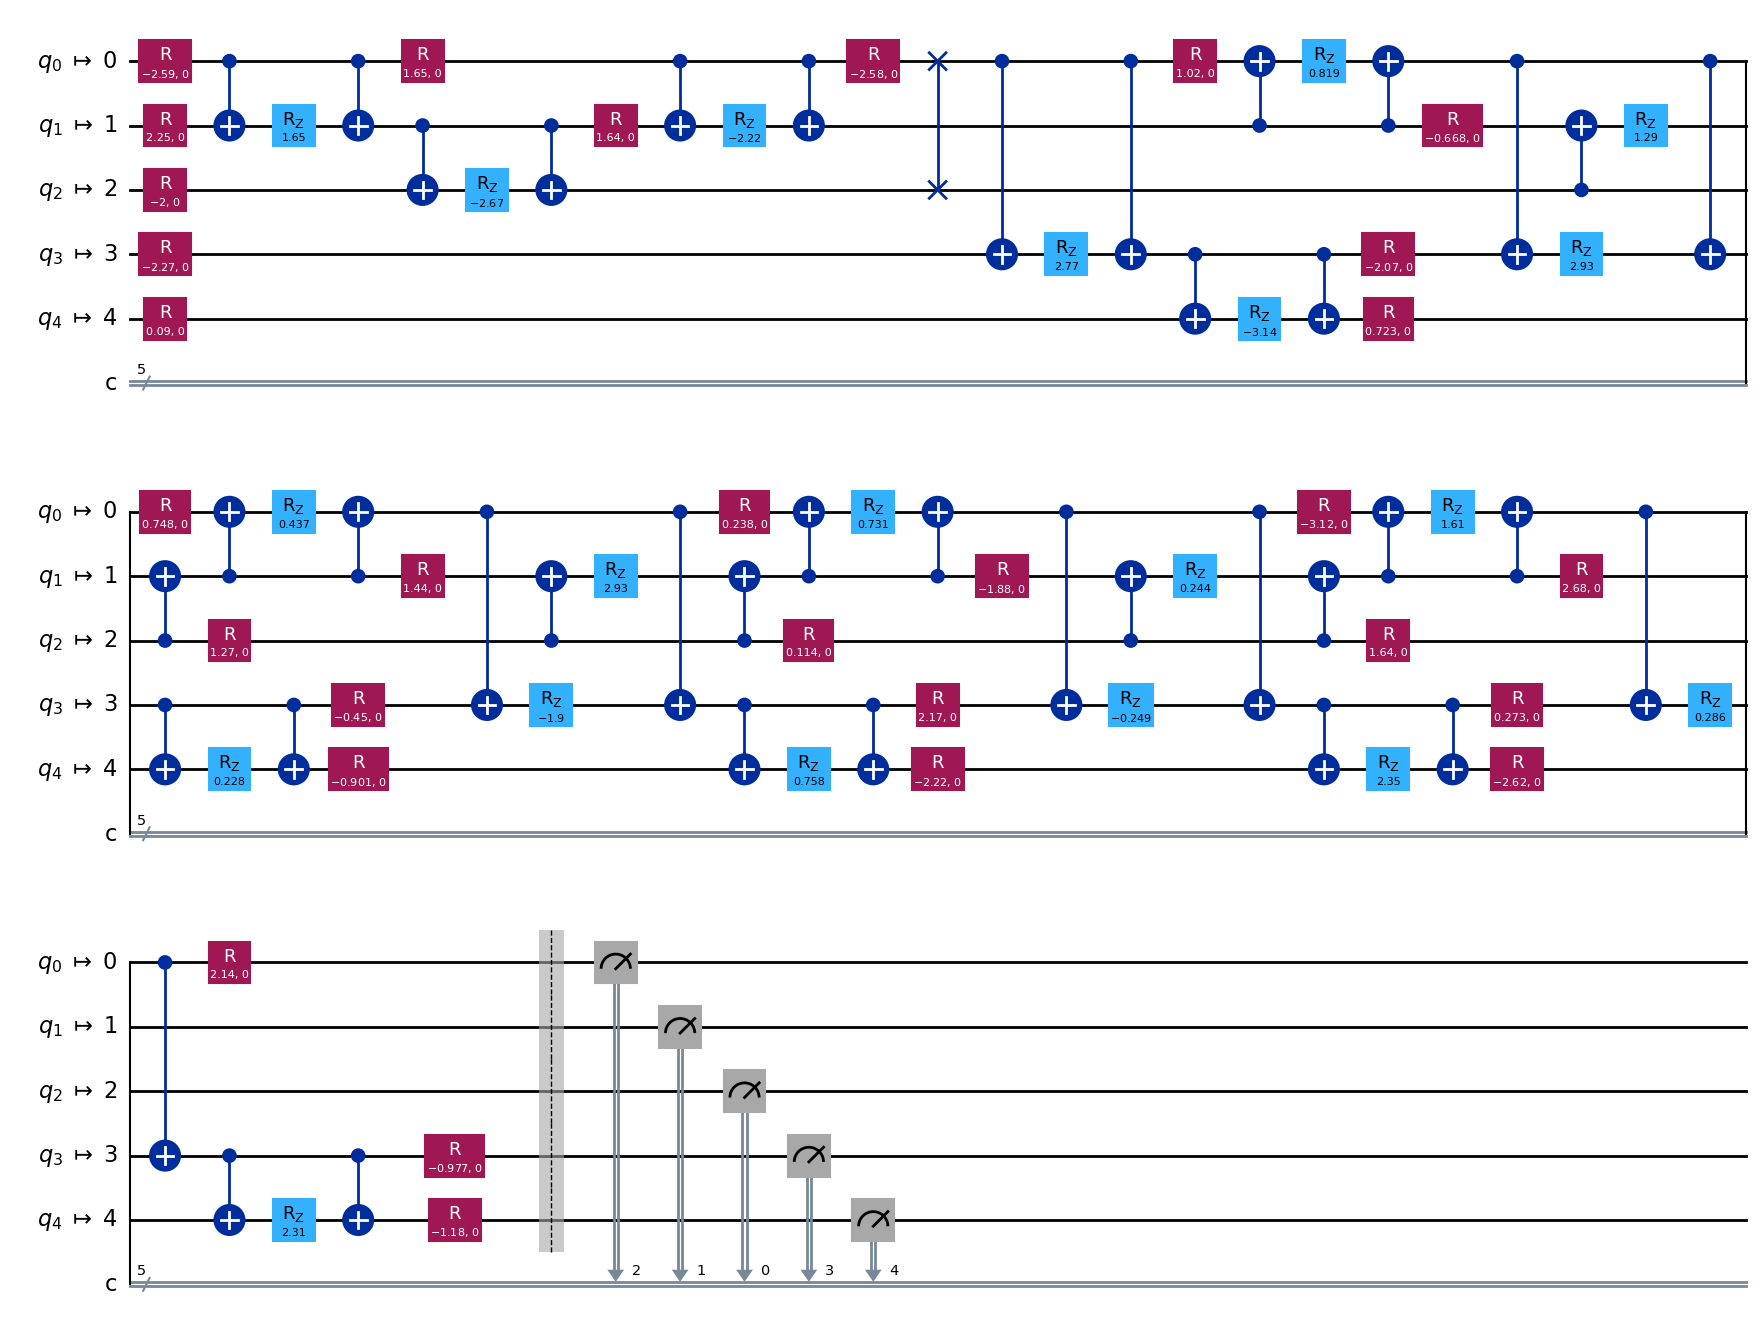

In [30]:
qc_mapped.draw("mpl")

In [5]:
import qiskit.circuit.library.n_local as TwoLocal

import numpy as np

num_qubits = 5
# circuit = TwoLocal(num_qubits, ["rx"], ["rzz"], entanglement="linear", reps=num_qubits).decompose()
# num_pars = len(circuit.parameters)
rng = np.random.default_rng()
values = rng.uniform(-np.pi, np.pi, size=num_pars)
circuit.assign_parameters(values, inplace=True)
circuit.measure_all()
circuit.draw(output="mpl")

In [27]:
from mqt.yaqs.core.data_structures.networks import MPS

state = MPS(num_qubits, state="zeros")

In [42]:
[{"name": name, "sites": list(i), "strength": gamma_arr[i]} for i in range(num_qubits) for name in ["lowering", "pauli_z"]]

[{'name': 'lowering', 'sites': [0], 'strength': 0.01},
 {'name': 'pauli_z', 'sites': [0], 'strength': 0.01},
 {'name': 'lowering', 'sites': [1], 'strength': 0.05},
 {'name': 'pauli_z', 'sites': [1], 'strength': 0.05},
 {'name': 'lowering', 'sites': [2], 'strength': 0.1},
 {'name': 'pauli_z', 'sites': [2], 'strength': 0.1},
 {'name': 'lowering', 'sites': [3], 'strength': 0.01},
 {'name': 'pauli_z', 'sites': [3], 'strength': 0.01},
 {'name': 'lowering', 'sites': [4], 'strength': 0.5},
 {'name': 'pauli_z', 'sites': [4], 'strength': 0.5}]

In [80]:
connected_noise = np.zeros((2,int(len(connectivity_set))))
for gate_index in range(2):
    for connectivity_index in range(len(connectivity_set)):
        connected_noise[gate_index,connectivity_index] = gate_index*0.02 + connectivity_index*0.0005 
connected_noise

array([[0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045],
       [0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 , 0.0235,
        0.024 , 0.0245]])

In [88]:
[
    {"name": name, "sites": [i], "strength": gamma_arr[i]} for i in range(num_qubits) for name in ["r", "rz"]
].append(
    [{"name": name, "sites": list(pair), "strength": connected_noise[gate_ind,pair_ind]} for pair_ind, pair in enumerate(connectivity_set) for gate_ind, name in enumerate(["cx", "swap"])
    ]
    )

In [94]:
from mqt.yaqs.core.data_structures.noise_model import NoiseModel
connected_noise = np.zeros((2,int(len(connectivity_set))))

for gate_index in range(2):
    for connectivity_index in range(len(connectivity_set)):
        connected_noise[gate_index,connectivity_index] = gate_index*0.02 + connectivity_index*0.0005 

gamma_arr = [0.01, 0.05, 0.1, 0.01, 0.5]

single_qubit_noise = [
    {"name": name, "sites": [i], "strength": gamma_arr[i]} 
    for i in range(num_qubits) 
    for name in ["r", "rz"]
]

two_qubit_noise = [
    {"name": name, "sites": list(pair), "strength": connected_noise[gate_ind, pair_ind]} 
    for pair_ind, pair in enumerate(connectivity_set) 
    for gate_ind, name in enumerate(["cx", "swap"])
]

# noise_model = NoiseModel(single_qubit_noise + two_qubit_noise)
single_qubit_noise + two_qubit_noise

[{'name': 'r', 'sites': [0], 'strength': 0.01},
 {'name': 'rz', 'sites': [0], 'strength': 0.01},
 {'name': 'r', 'sites': [1], 'strength': 0.05},
 {'name': 'rz', 'sites': [1], 'strength': 0.05},
 {'name': 'r', 'sites': [2], 'strength': 0.1},
 {'name': 'rz', 'sites': [2], 'strength': 0.1},
 {'name': 'r', 'sites': [3], 'strength': 0.01},
 {'name': 'rz', 'sites': [3], 'strength': 0.01},
 {'name': 'r', 'sites': [4], 'strength': 0.5},
 {'name': 'rz', 'sites': [4], 'strength': 0.5},
 {'name': 'cx', 'sites': [0, 1], 'strength': np.float64(0.0)},
 {'name': 'swap', 'sites': [0, 1], 'strength': np.float64(0.02)},
 {'name': 'cx', 'sites': [1, 2], 'strength': np.float64(0.0005)},
 {'name': 'swap', 'sites': [1, 2], 'strength': np.float64(0.0205)},
 {'name': 'cx', 'sites': [2, 1], 'strength': np.float64(0.001)},
 {'name': 'swap', 'sites': [2, 1], 'strength': np.float64(0.021)},
 {'name': 'cx', 'sites': [3, 4], 'strength': np.float64(0.0015)},
 {'name': 'swap',
  'sites': [3, 4],
  'strength': np.floa

In [47]:
print(arch)

In [ ]:
from mqt.yaqs.core.data_structures.simulation_parameters import WeakSimParams

sim_params = WeakSimParams(shots=1024, max_bond_dim=4, threshold=1e-6)